## Import libraries

In [13]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import requests
from PIL import Image

## Load local processor and model

In [14]:
# Load the processor and model
processor = BlipProcessor.from_pretrained('../../../trained_models/blip_image_captioning_base')
model = BlipForConditionalGeneration.from_pretrained("../../../trained_models/blip_image_captioning_base")

## Caption an online image (conditional and unconditional)

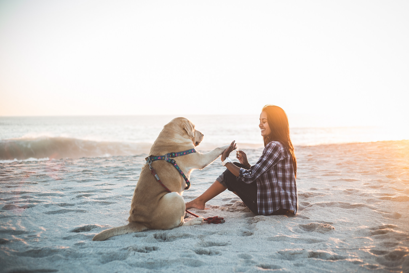

Conditional caption: a photography of a woman and her dog on the beach
Unconditional caption: a woman sitting on the beach with her dog


In [15]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
w,h = raw_image.size
display(raw_image.resize((w//5,h//5)))

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt")

out = model.generate(**inputs)
conditional_caption = processor.decode(out[0], skip_special_tokens=True)

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt")

out = model.generate(**inputs)
unconditional_caption = processor.decode(out[0], skip_special_tokens=True)

print(f'Conditional caption: {conditional_caption}')
print(f'Unconditional caption: {unconditional_caption}')

## Unconditionally caption a local image

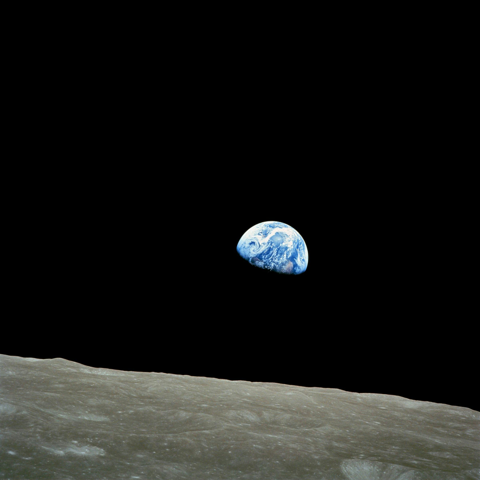

Caption: earth rising over the moon


In [16]:
# Open an image
image_path = "../../../images/earth.jpg"
raw_image = Image.open(image_path).convert("RGB")
w,h = raw_image.size
display(raw_image.resize((w//5,h//5)))

# Preprocess the image and generate captions
inputs = processor(images=raw_image, return_tensors="pt")
outputs = model.generate(**inputs)

# Decode the generated text
caption = processor.decode(outputs[0], skip_special_tokens=True)
print("Caption:", caption)